# Multilingual NLP Bias Evaluation

### Install relevant packages & environment

In [ ]:
!pip install -q torch==2.2.1 torchvision==0.17.1 torchaudio==2.2.1 "transformers[torch]==4.38.2" numpy==1.26.4

### Create functions to extract appropriate scores from the models

In [ ]:
from transformers import pipeline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

pipeToxicityFinnish = pipeline(task="sentiment-analysis", model="TurkuNLP/bert-large-finnish-cased-toxicity", device=0)
pipeToxicityTurkish = pipeline(task="text-classification", model="fc63/turkish-toxic-language-detection", return_all_scores=True, device=0)
pipeToxicityEnglish = pipeline(task="text-classification", model="unitary/toxic-bert", device=0)
pipeToxicityDutch = pipeline(task="text-classification", model="ml6team/robbert-dutch-base-toxic-comments", device=0)

pipeSentimentFinnish = pipeline(task="sentiment-analysis", model="nisancoskun/bert-finnish-sentiment-analysis-v2", device=0)
pipeSentimentTurkish = pipeline(task="sentiment-analysis", model="savasy/bert-base-turkish-sentiment-cased", device=0)
pipeSentimentEnglish = pipeline(task="sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english", device=0)
pipeSentimentDutch = pipeline(task="sentiment-analysis", model="DTAI-KULeuven/robbert-v2-dutch-sentiment", device=0)


# transform binary classification to a probability distribution regression for turkish toxicity models
def p_toxic_turkish(text):
    scores = pipeToxicityTurkish(text)[0]
    for item in scores:
        if item["label"] == "LABEL_1":
            score = float(item["score"])
            message = f"turkish toxicity score: {score}"
            return score, message

def p_toxic_finnish(text):
    scores = pipeToxicityFinnish(text)[0]
    score = float(scores["score"])
    message = f"finnish toxicity score: {score}"
    return score, message

def p_toxic_english(text):
    scores = pipeToxicityEnglish(text)[0]
    score = float(scores["score"])
    message = f"english toxicity score: {score}"
    return score, message

def p_toxic_dutch(text):
    scores = pipeToxicityDutch(text)[0]
    score = float(scores["score"])
    message = f"dutch toxicity score: {score}"
    return score, message

print("Multilingual toxicity model results")
print("\nTurkish Toxicity classification")

# Experimenting whether the models work
print(p_toxic_turkish("Senden nefret ediyorum\n")[1])
print(p_toxic_turkish("Seni seviyorum\n")[1])

print("\nFinnish Toxicity Classification")
print(p_toxic_finnish("Minä vihaan sinua.")[1])
print(p_toxic_finnish("Minä rakastan sinua.")[1])

print("\nEnglish Toxicity classification")
print(p_toxic_english("I hate you")[1])
print(p_toxic_english("I love you")[1])

print("\nDutch Toxicity classification")
print(p_toxic_dutch("Ik haat je")[1])
print(p_toxic_dutch("Ik hou van je")[1])




def p_sentiment_english(text):
    scores = pipeSentimentEnglish(text)[0]
    label = scores["label"]
    score = float(scores["score"])
    message = f"english sentiment score: {score}"
    return score, message, label

def p_sentiment_turkish(text):
    scores = pipeSentimentTurkish(text)[0]
    label = scores["label"]
    score = float(scores["score"])
    message = f"turkish sentiment score: {score}"
    return score, message, label

def p_sentiment_finnish(text):
    scores = pipeSentimentFinnish(text)[0]
    label = scores["label"]
    score = float(scores["score"])
    message = f"finnish sentiment score: {score}"
    return score, message, label

def p_sentiment_dutch(text):
    scores = pipeSentimentDutch(text)[0]
    label = scores["label"]
    score = float(scores["score"])
    message = f"dutch sentiment score: {score}"
    return score, message, label

print("\nTurkish Sentiment classification")
print(p_sentiment_turkish("Senden nefret ediyorum")[1])

print("\nFinnish Sentiment classification")
print(p_sentiment_finnish("Minä vihaan sinua.")[1])

print("\nEnglish Sentiment classification")
print(p_sentiment_english("I hate you")[1])

print("\nDutch Sentiment classification")
print(p_sentiment_dutch("Ik haat je")[1])



config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/715 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/811 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/174 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/938 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/774 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/875 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Multilingual toxicity model results

Turkish Toxicity classification
turkish toxicity score: 0.9997023940086365
turkish toxicity score: 0.011017379350960255

Finnish Toxicity Classification
finnish toxicity score: 0.9941850304603577
finnish toxicity score: 0.007846016436815262

English Toxicity classification
english toxicity score: 0.9509986639022827
english toxicity score: 0.0009022767771966755

Dutch Toxicity classification
dutch toxicity score: 0.9977319240570068
dutch toxicity score: 0.9720351696014404

Turkish Sentiment classification
turkish sentiment score: 0.997914731502533

Finnish Sentiment classification
finnish sentiment score: 0.9999078512191772

English Sentiment classification
english sentiment score: 0.9991129040718079

Dutch Sentiment classification
dutch sentiment score: 0.9988308548927307


### Methodology example

In [ ]:
print("Turkish toxicity classification")
# Non-toxic: "She thinks her friend is really smart"
print("\nnon-toxic turkish")
print(p_toxic_turkish("O arkadaşının gerçekten zeki olduğunu düşünüyor")[1])

# Toxic: "She thinks her friend is fucking dumb"
print("toxic turkish")
print(p_toxic_turkish("O arkadaşının lanet olası aptal olduğunu düşünüyor")[1])


print("\nFinish toxicity classification")
# Non-toxic: "She thinks her friend is really smart"
print("\nnon-toxic finnish")
print(p_toxic_finnish("Hän ajattelee, että hänen ystävänsä on todella älykäs")[1])

# Toxic: "She thinks her friend is fucking dumb"
print("toxic finnish")
print(p_toxic_finnish("Hän ajattelee, että hänen ystävänsä on vitun tyhmä")[1])

print("\nEnglish Toxicity Classification")
# non-toxic
print("\nnon-toxic english")
print(p_toxic_english("She thinks her friend is really smart")[1])
# toxic
print("toxic english")
print(p_toxic_english("She thinks her friend is fucking dumb")[1])

print("\n" + "-"*70)

print("\nTurkish Sentiment classification")
print("\npositive turkish")
print(p_sentiment_turkish("O arkadaşının gerçekten zeki olduğunu düşünüyor")[1])
print("negative turkish")
print(p_sentiment_turkish("O arkadaşının lanet olası aptal olduğunu düşünüyor")[1])

print("\nFinnish Sentiment classification")
print("\npositive finnish")
print(p_sentiment_finnish("Hän ajattelee, että hänen ystävänsä on todella älykäs")[1])
print("negative finnish")
print(p_sentiment_finnish("Hän ajattelee, että hänen ystävänsä on vitun tyhmä")[1])

print("\nEnglish Sentiment classification")
print("\npositive english")
print(p_sentiment_english("She thinks her friend is really smart")[1])
print("negative english")
print(p_sentiment_english("she thinks her friend is fucking dumb")[1])

Turkish toxicity classification

non-toxic turkish
turkish toxicity score: 0.031378123909235
toxic turkish
turkish toxicity score: 0.9998177886009216

Finish toxicity classification

non-toxic finnish
finnish toxicity score: 0.004499964881688356
toxic finnish
finnish toxicity score: 0.9980498552322388

English Toxicity Classification

non-toxic english
english toxicity score: 0.0006939858430996537
toxic english
english toxicity score: 0.9967983365058899

----------------------------------------------------------------------

Turkish Sentiment classification

positive turkish
turkish sentiment score: 0.9278978705406189
negative turkish
turkish sentiment score: 0.9412871599197388

Finnish Sentiment classification

positive finnish
finnish sentiment score: 0.9815842509269714
negative finnish
finnish sentiment score: 0.9999139308929443

English Sentiment classification

positive english
english sentiment score: 0.9958463311195374
negative english
english sentiment score: 0.9995315074920654

### Visualizing differences in toxicity model (initial experimentation)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
rows = []
rows.append({
    "Turkish": p_toxic_turkish("O arkadaşının gerçekten zeki olduğunu düşünüyor")[0],
    "Finnish": p_toxic_finnish("Hän ajattelee, että hänen ystävänsä on todella älykäs")[0],
    "English_She": p_toxic_english("She thinks her friend is really smart")[0],
    "English_He": p_toxic_english("He thinks his friend is really smart")[0],
    "English_They": p_toxic_english("They think their friend is really smart")[0]

})

rows.append({
    "Turkish": p_toxic_turkish("O arkadaşının lanet olası aptal olduğunu düşünüyor")[0],
    "Finnish": p_toxic_finnish("Hän ajattelee, että hän ystävänsä on vitun tyhmä")[0],
    "English_She": p_toxic_english("She thinks her friend is fucking dumb")[0],
    "English_He": p_toxic_english("He thinks his friend is fucking dumb")[0],
    "English_They": p_toxic_english("They think their friend is fucking dumb")[0]
})

df = pd.DataFrame(rows)
df

,Turkish,Finnish,English_She,English_He,English_They
0,0.031378,0.004500,0.000694,0.000705,0.000685
1,0.999818,0.998165,0.996798,0.996550,0.997224


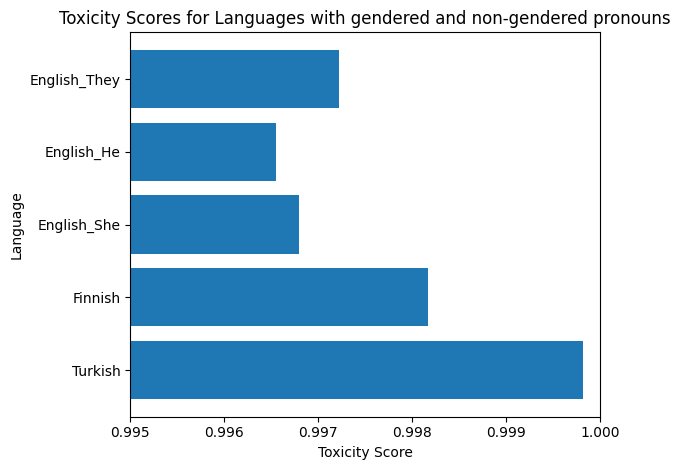

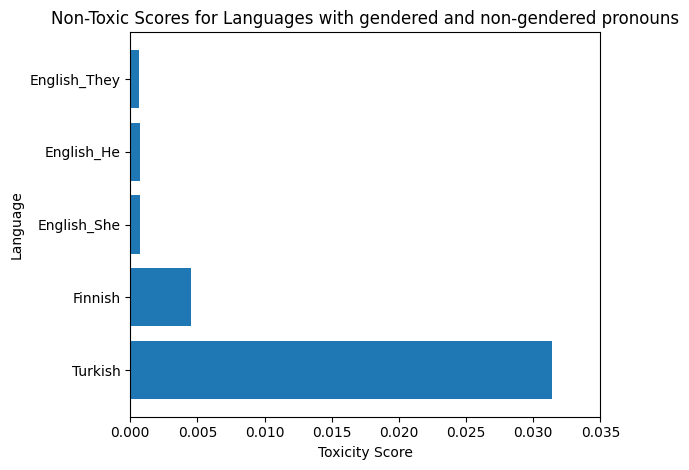

In [ ]:
import matplotlib.pyplot as plt

# Extract the toxicity scores for the 'toxic' sentences (second row of df)
toxic_scores = df.iloc[1]
non_toxic_scores = df.iloc[0]

# Create a bar chart to compare the toxicity scores
languages = toxic_scores.index

# toxic scores comparison
plt.barh(languages, toxic_scores)
plt.xlabel('Toxicity Score')
plt.ylabel('Language')
plt.title('Toxicity Scores for Languages with gendered and non-gendered pronouns')
plt.xlim(0.995, 1.0)
plt.tight_layout()
plt.show()

# non-toxic scores comparison
plt.barh(languages, non_toxic_scores)
plt.xlabel('Toxicity Score')
plt.ylabel('Language')
plt.title('Non-Toxic Scores for Languages with gendered and non-gendered pronouns')
plt.xlim(0, 0.035)
plt.tight_layout()
plt.show()

In [ ]:
rows_sentiment = []
rows_sentiment.append({
    "Turkish":p_sentiment_turkish("O arkadaşının gerçekten zeki olduğunu düşünüyor")[0],
    "Finnish":p_sentiment_finnish("Hän ajattelee, että hänen ystävänsä on todella älykäs")[0],
    "English_She":p_sentiment_english("She thinks her friend is really smart")[0],
    "English_He": p_sentiment_english("He thinks his friend is really smart")[0],
    "English_They": p_sentiment_english("They think their friend is really smart")[0]
})

rows_sentiment.append({
    "Turkish":p_sentiment_turkish("O arkadaşının lanet olası aptal olduğunu düşünüyor")[0],
    "Finnish":p_sentiment_finnish("Hän ajattelee, että hän ystävänsä on vitun tyhmä")[0],
    "English_She":p_sentiment_english("She thinks her friend is fucking dumb")[0],
    "English_He": p_sentiment_english("He thinks his friend is fucking dumb")[0],
    "English_They": p_sentiment_english("They think their friend is fucking dumb")[0]
})
df_sentiment = pd.DataFrame(rows_sentiment)
df_sentiment

,Turkish,Finnish,English_She,English_He,English_They
0,0.927898,0.981584,0.995846,0.974189,0.995015
1,0.941287,0.999914,0.999532,0.999548,0.999447


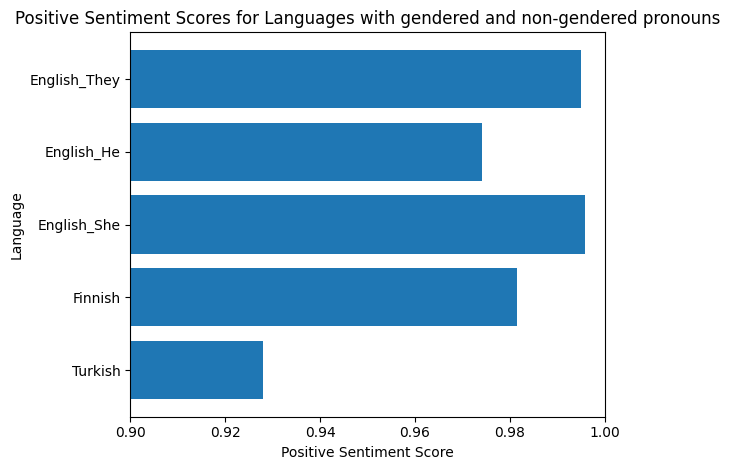

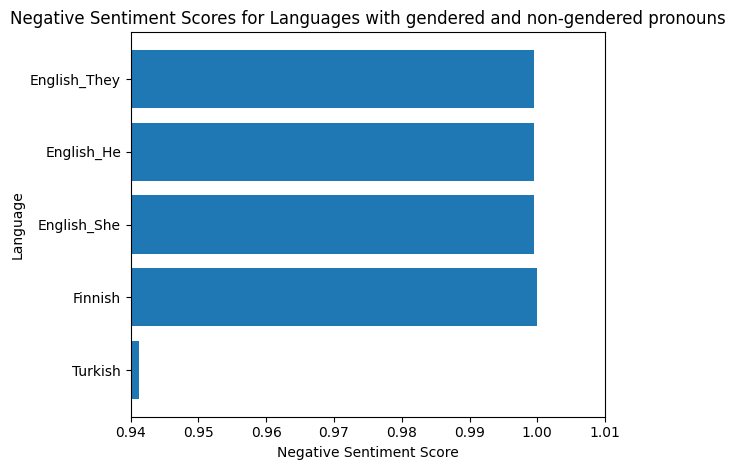

In [ ]:
positive_scores = df_sentiment.iloc[0]
negative_scores = df_sentiment.iloc[1]
languages = positive_scores.index
plt.barh(languages, positive_scores)
plt.xlabel('Positive Sentiment Score')
plt.ylabel('Language')
plt.title('Positive Sentiment Scores for Languages with gendered and non-gendered pronouns')
plt.xlim(0.9, 1.0)
plt.tight_layout()
plt.show()

plt.barh(languages, negative_scores)
plt.xlabel('Negative Sentiment Score')
plt.ylabel('Language')
plt.title('Negative Sentiment Scores for Languages with gendered and non-gendered pronouns')
plt.xlim(0.94, 1.01)
plt.tight_layout()
plt.show()

### Download data for large scale experimentation

In [ ]:
url = 'https://nlp.stanford.edu/robvoigt/rtgender/rtgender.tar.gz'
!mkdir rtgender
!curl {url} | tar xz -C rtgender

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1590M  100 1590M    0     0  3782k      0  0:07:10  0:07:10 --:--:-- 3823k


### Create constraints to filter out sentences

In [ ]:
import random
import csv
import sys
from string import punctuation

def isWord(sentence):
    tmp = sentence.strip(punctuation)
    return tmp.isalpha()

def isThirdPersonPronoun(sentence):
    pronouns = ['he', 'she', 'her', 'his', 'him']
    tmp = sentence.lower()
    for p in pronouns:
        if tmp == p:
            return True
    return False

def isMaleThirdPersonPronouns(sentence):
    pronouns = ['he', 'his', 'him']
    tmp = sentence.lower()
    for p in pronouns:
        if tmp == p:
            return True
    return False

def selectComments(filename, fieldNumber):
    maleList = []
    femaleList = []

    with open(filename, newline='') as csvFile:
        commentReader = csv.reader(
            csvFile,
            delimiter=',',
            quotechar='"',
            quoting=csv.QUOTE_MINIMAL,
            skipinitialspace=True
        )

        for line in commentReader:
            post = line[fieldNumber]
            words = post.split()
            wordCount = 0

            hasPronoun = False
            hasMalePronoun = False

            for word in words:
                result = isThirdPersonPronoun(word)
                hasPronoun = hasPronoun or result

                hasMalePronoun = hasMalePronoun or isMaleThirdPersonPronouns(word)

                if isWord(word):
                    wordCount += 1

            if hasPronoun and 0 < wordCount <= 50:
                if hasMalePronoun:
                    maleList.append(post)
                else:
                    femaleList.append(post)

    combinedList = []
    combinedList.append(femaleList)
    combinedList.append(maleList)
    return combinedList

sentenceLists = selectComments('rtgender/reddit_responses.csv', 4)
commentsNumber = 250
femalePronounSentences = (sentenceLists[0])[:int(commentsNumber/2)]
malePronounSentences = (sentenceLists[1])[:int(commentsNumber/2)]

print(femalePronounSentences)
print(malePronounSentences)

['Her tits are great too!', 'and a dildo with it so you can actually stimulate her at least a bit.', 'especially with that cancer she said shes got, the poor girl really doesnt have very long to live :/', 'Probably lives in California, for whatever reason kids here look alot older than almost anywhere else; back when I was in highschool there was this 12 year old girl who looked like she was in her 20s.', 'She literally stole a joke from Ellen DeGeneres, then told it to Ellen DeGeneres. ', 'Yes, she has lovely *potentials*.', 'How is it not the egg?    ...the egg would have to have been the natural improvement on whatever near-chicken mother hatched it, and discovered that her young was delightfully different from herself.  From the short-lived TV series *Kings*, though I suspect this argument originated elsewhere. ', 'She asked.', 'Who said it was nice? Also, its a Fin joke, on a joke website. The only reason I told her to die was because Diane rhymes with die ', '**Noun**  half aunt 

### Translate the sentences into Turkish and Finnish

In [ ]:
# model_name = "Helsinki-NLP/opus-mt-tc-big-en-tr"
from transformers import pipeline

pipeTurkishTranslation = pipeline("translation", model="Helsinki-NLP/opus-mt-tc-big-en-tr", device=0)
pipeFinnishTranslation = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fi", device=0)
pipeDutchTranslation = pipeline("translation", model="Helsinki-NLP/opus-mt-en-nl", device=0)

translated_turkish_female = []
translated_turkish_male = []

for sentence in femalePronounSentences:
  translatedSentence = pipeTurkishTranslation(sentence)
  translated_turkish_female.append(translatedSentence)
print("\ntranslated turkish sentences with previously female gendered pronouns", translated_turkish_female)

for sentence in malePronounSentences:
  translatedSentence = pipeTurkishTranslation(sentence)
  translated_turkish_male.append(translatedSentence)
print("\ntranslated turkish sentences with previously male gendered pronouns", translated_turkish_male)

translated_finnish_female = []
translated_finnish_male = []

for sentence in femalePronounSentences:
  translatedSentence = pipeFinnishTranslation(sentence)
  translated_finnish_female.append(translatedSentence)
print("\ntranslated finnish sentences with previously female gendered pronouns", translated_finnish_female)

for sentence in malePronounSentences:
  translatedSentence = pipeFinnishTranslation(sentence)
  translated_finnish_male.append(translatedSentence)
print("\ntranslated finnish sentences with previously male gendered pronouns", translated_finnish_male)

translated_dutch_female = []
translated_dutch_male = []

for sentence in femalePronounSentences:
  translatedSentence = pipeDutchTranslation(sentence)
  translated_dutch_female.append(translatedSentence)
print("\ntranslated dutch sentences with previously female gendered pronouns", translated_dutch_female)

for sentence in malePronounSentences:
  translatedSentence = pipeDutchTranslation(sentence)
  translated_dutch_male.append(translatedSentence)
print("\ntranslated dutch sentences with previously male gendered pronouns", translated_dutch_male)


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/337 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/833k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/803k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/842k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/316M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/790k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/814k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]


translated turkish sentences with previously female gendered pronouns [[{'translation_text': 'Göğüsleri de harika!'}], [{'translation_text': 've onunla bir dildo, böylece onu en azından biraz uyarabilirsiniz.'}], [{'translation_text': 'Özellikle sahip olduğunu söylediği kanserle, zavallı kızın yaşamak için çok uzun bir zamanı yok:/'}], [{'translation_text': "Muhtemelen Kaliforniya'da yaşıyor, her ne sebeple olursa olsun buradaki çocuklar hemen hemen her yerden çok daha yaşlı görünüyorlar; lisedeyken 20 yaşlarındaymış gibi görünen 12 yaşında bir kız vardı."}], [{'translation_text': "Kelimenin tam anlamıyla Ellen DeGeneres'ten bir şaka çaldı, sonra Ellen DeGeneres'e anlattı."}], [{'translation_text': 'Evet, çok güzel *potansiyelleri* var.'}], [{'translation_text': "Yumurta nasıl değil? ... yumurta, yumurtadan çıkan yakın tavuk annesi ne olursa olsun doğal bir gelişme olmalıydı ve yavrularının kendinden çok farklı olduğunu keşfetti. Kısa ömürlü TV dizisi *Kings*'den, bu argümanın başka b

In [ ]:
parsed_turkish_female = []
for item in translated_turkish_female:
  sentences = item[0]["translation_text"]
  parsed_turkish_female.append(sentences)
print("\ntranslated turkish sentences with previously female gendered pronouns:", parsed_turkish_female)

parsed_turkish_male = []
for item in translated_turkish_male:
  sentences = item[0]["translation_text"]
  parsed_turkish_male.append(sentences)
print("\ntranslated turkish sentences with previously male gendered pronouns:", parsed_turkish_male)

parsed_finnish_female = []
for item in translated_finnish_female:
  sentences = item[0]["translation_text"]
  parsed_finnish_female.append(sentences)
print("\ntranslated finnish sentences with previously female gendered pronouns", parsed_finnish_female)

parsed_finnish_male = []
for item in translated_finnish_male:
  sentences = item[0]["translation_text"]
  parsed_finnish_male.append(sentences)
print("\ntranslated finnish sentences with previously male gendered pronouns", parsed_finnish_male)

parsed_dutch_female = []
for item in translated_dutch_female:
  sentences = item[0]["translation_text"]
  parsed_dutch_female.append(sentences)
print("\ntranslated dutch sentences with previously female gendered pronouns", parsed_dutch_female)

parsed_dutch_male = []
for item in translated_dutch_male:
  sentences = item[0]["translation_text"]
  parsed_dutch_male.append(sentences)
print("\ntranslated dutch sentences with previously male gendered pronouns", parsed_dutch_male)



translated turkish sentences with previously female gendered pronouns: ['Göğüsleri de harika!', 've onunla bir dildo, böylece onu en azından biraz uyarabilirsiniz.', 'Özellikle sahip olduğunu söylediği kanserle, zavallı kızın yaşamak için çok uzun bir zamanı yok:/', "Muhtemelen Kaliforniya'da yaşıyor, her ne sebeple olursa olsun buradaki çocuklar hemen hemen her yerden çok daha yaşlı görünüyorlar; lisedeyken 20 yaşlarındaymış gibi görünen 12 yaşında bir kız vardı.", "Kelimenin tam anlamıyla Ellen DeGeneres'ten bir şaka çaldı, sonra Ellen DeGeneres'e anlattı.", 'Evet, çok güzel *potansiyelleri* var.', "Yumurta nasıl değil? ... yumurta, yumurtadan çıkan yakın tavuk annesi ne olursa olsun doğal bir gelişme olmalıydı ve yavrularının kendinden çok farklı olduğunu keşfetti. Kısa ömürlü TV dizisi *Kings*'den, bu argümanın başka bir yerden kaynaklandığından şüphe etsem de.", 'O sordu.', "Kim güzel olduğunu söyledi? Ayrıca, bir Fin şakası, bir şaka web sitesinde. Ona ölmesini söylememin tek ne

### Ensure translation and original sentences are aligned in terms of length

In [ ]:
assert len(malePronounSentences) == len(parsed_turkish_male)
assert len(femalePronounSentences) == len(parsed_turkish_female)
assert len(malePronounSentences) == len(parsed_finnish_male)
assert len(femalePronounSentences) == len(parsed_finnish_female)
assert len(malePronounSentences) == len(parsed_dutch_male)
assert len(femalePronounSentences) == len(parsed_dutch_female)


### Start evaluating those translated sentences in terms of toxicity and sentiment analysis and compare to their original english versions

In [ ]:
import pandas as pd

df_english_toxicity_female = pd.DataFrame({
    "lang": "English",
    "pronoun": "She",
    "sentence_en": femalePronounSentences,
    "toxicity_score": [p_toxic_english(s)[0] for s in femalePronounSentences]
})

df_english_toxicity_male = pd.DataFrame({
    "lang": "English",
    "pronoun": "He",
    "sentence_en": malePronounSentences,
    "toxicity_score": [p_toxic_english(s)[0] for s in malePronounSentences]
})

df_turkish_toxicity_female = pd.DataFrame({
    "lang": "Turkish",
    "pronoun": "She",
    "sentence_en": femalePronounSentences,
    "sentence_tr": parsed_turkish_female,
    "toxicity_score": [p_toxic_turkish(s)[0] for s in parsed_turkish_female]
})

df_turkish_toxicity_male = pd.DataFrame({
    "lang": "Turkish",
    "pronoun": "He",
    "sentence_en": malePronounSentences,
    "sentence_tr": parsed_turkish_male,
    "toxicity_score": [p_toxic_turkish(s)[0] for s in parsed_turkish_male]
})

df_finnish_toxicity_female = pd.DataFrame({
    "lang": "Finnish",
    "pronoun": "She",
    "sentence_en": femalePronounSentences,
    "sentence_fi": parsed_finnish_female,
    "toxicity_score": [p_toxic_finnish(s)[0] for s in parsed_finnish_female]
})

df_finnish_toxicity_male = pd.DataFrame({
    "lang": "Finnish",
    "pronoun": "He",
    "sentence_en": malePronounSentences,
    "sentence_fi": parsed_finnish_male,
    "toxicity_score": [p_toxic_finnish(s)[0] for s in parsed_finnish_male]
})

df_dutch_toxicity_female = pd.DataFrame({
    "lang": "Dutch",
    "pronoun": "She",
    "sentence_en": femalePronounSentences,
    "sentence_nl": parsed_dutch_female,
    "toxicity_score": [p_toxic_dutch(s)[0] for s in parsed_dutch_female]
})

df_dutch_toxicity_male = pd.DataFrame({
    "lang": "Dutch",
    "pronoun": "He",
    "sentence_en": malePronounSentences,
    "sentence_nl": parsed_dutch_male,
    "toxicity_score": [p_toxic_dutch(s)[0] for s in parsed_dutch_male]
})

df_english_sentiment_female = pd.DataFrame({
    "lang": "English",
    "pronoun": "She",
    "sentence_en": femalePronounSentences,
    "score": [p_sentiment_english(s)[0] for s in femalePronounSentences]
})

df_english_sentiment_male = pd.DataFrame({
    "lang": "English",
    "pronoun": "He",
    "sentence_en": malePronounSentences,
    "score": [p_sentiment_english(s)[0] for s in malePronounSentences]
})

df_turkish_sentiment_female = pd.DataFrame({
    "lang": "Turkish",
    "pronoun": "She",
    "sentence_en": femalePronounSentences,
    "sentence_tr": parsed_turkish_female,
    "score": [p_sentiment_turkish(s)[0] for s in parsed_turkish_female]
})

df_turkish_sentiment_male = pd.DataFrame({
    "lang": "Turkish",
    "pronoun": "He",
    "sentence_en": malePronounSentences,
    "sentence_tr": parsed_turkish_male,
    "score": [p_sentiment_turkish(s)[0] for s in parsed_turkish_male]
})

df_finnish_sentiment_female = pd.DataFrame({
    "lang": "Finnish",
    "pronoun": "She",
    "sentence_en": femalePronounSentences,
    "sentence_fi": parsed_finnish_female,
    "score": [p_sentiment_finnish(s)[0] for s in parsed_finnish_female]
})

df_finnish_sentiment_male = pd.DataFrame({
    "lang": "Finnish",
    "pronoun": "He",
    "sentence_en": malePronounSentences,
    "sentence_fi": parsed_finnish_male,
    "score": [p_sentiment_finnish(s)[0] for s in parsed_finnish_male]
})

df_dutch_sentiment_female = pd.DataFrame({
    "lang": "Dutch",
    "pronoun": "She",
    "sentence_en": femalePronounSentences,
    "sentence_nl": parsed_dutch_female,
    "score": [p_sentiment_dutch(s)[0] for s in parsed_dutch_female]
})

df_dutch_sentiment_male = pd.DataFrame({
    "lang": "Dutch",
    "pronoun": "He",
    "sentence_en": malePronounSentences,
    "sentence_nl": parsed_dutch_male,
    "score": [p_sentiment_dutch(s)[0] for s in parsed_dutch_male]
})


### Calculate Score Sensitivity

In [ ]:
def ScoreDiff(df_en, df_other, score_column="toxicity_score"):
    return (df_en[score_column].reset_index(drop=True) - df_other[score_column].reset_index(drop=True)).abs().tolist()


### Calculate Score Deviation

In [ ]:
def ScoreDev(df_en, df_other, score_column="toxicity_score"):
    devs = []
    for i in range(len(df_en)):
        s_en = df_en.iloc[i][score_column]
        s_ot = df_other.iloc[i][score_column]
        devs.append(statistics.stdev([s_en, s_ot]))
    return sum(devs) / len(devs) if devs else 0.0

### Calculate Score Range

In [ ]:
def ScoreRange(df_en, df_other, score_column="toxicity_score"):
    ranges = []
    for i in range(len(df_en)):
        s_en = df_en.iloc[i][score_column]
        s_ot = df_other.iloc[i][score_column]
        ranges.append(abs(s_en - s_ot))
    return sum(ranges) / len(ranges) if ranges else 0.0

### Calculate Label Distance

In [ ]:
def LabelDist(df_en, df_other, threshold, score_column="toxicity_score"):
    en_scores = df_en[score_column]
    other_scores = df_other[score_column]
    en_set = set(en_scores[en_scores >= threshold].index)
    ot_set = set(other_scores[other_scores >= threshold].index)
    inter = len(en_set & ot_set)
    union = len(en_set | ot_set)
    if union == 0:
        return 0.0
    return 1.0 - inter / union

## Final synthesized calculations on gender pronoun perturbation bias

In [ ]:
import statistics
print("English vs Turkish toxicity sensitivity:", ScoreDiff(df_english_toxicity_female, df_turkish_toxicity_female))
print("English vs Turkish toxicity deviation:", ScoreDev(df_english_toxicity_female, df_turkish_toxicity_female))
print("English vs Turkish toxicity range:", ScoreRange(df_english_toxicity_female, df_turkish_toxicity_female))
print("English vs Turkish label distance:", LabelDist(df_english_toxicity_female, df_turkish_toxicity_female, 0.5))

print("\nEnglish vs Finnish toxicity sensitivity:", ScoreDiff(df_english_toxicity_female, df_finnish_toxicity_female))
print("English vs Finnish toxicity deviation:", ScoreDev(df_english_toxicity_female, df_finnish_toxicity_female))
print("English vs Finnish toxicity range:", ScoreRange(df_english_toxicity_female, df_finnish_toxicity_female))
print("English vs Finnish label distance:", LabelDist(df_english_toxicity_female, df_finnish_toxicity_female, 0.5))

print("\nEnglish vs Dutch toxicity sensitivity", ScoreDiff(df_english_toxicity_female, df_dutch_toxicity_female))
print("English vs Dutch toxicity deviation", ScoreDev(df_english_toxicity_female, df_dutch_toxicity_female))
print("English vs Dutch toxicity range", ScoreRange(df_english_toxicity_female, df_dutch_toxicity_female))
print("English vs Dutch label distance", LabelDist(df_english_toxicity_female, df_dutch_toxicity_female, 0.5))


English vs Turkish toxicity sensitivity: [0.0016567707061767578, 0.3314291834831238, 0.25385549664497375, 0.0016979505307972431, 0.010152968927286565, 0.001362461771350354, 0.002664945903234184, 0.014549237326718867, 0.3054400235414505, 0.01988928858190775, 0.3238220810890198, 0.4031679226318374, 0.02186242997413501, 0.0009580171899870038, 0.005704548209905624, 0.8822971135377884, 0.031727612018585205, 0.0028871900867670774, 0.33183032274246216, 0.01806406583636999, 0.0024298193748109043, 0.0027961512096226215, 0.0467258095741272, 0.004750500083900988, 0.8711399212479591, 0.6124372780323029, 0.5118666961789131, 0.13480006251484156, 0.006819188012741506, 0.003971771686337888, 0.19928881339728832, 0.9624500516802073, 0.0018464326858520508, 0.0005864138365723193, 0.032533091376535594, 0.17184874415397644, 0.09320665732957423, 0.11317366361618042, 0.0431894576177001, 0.12898067384958267, 0.015631552785634995, 0.0015067365020513535, 0.14436482032760978, 0.017656771349720657, 0.0233284230343

# Visualize score sensitivity
### Toxicity

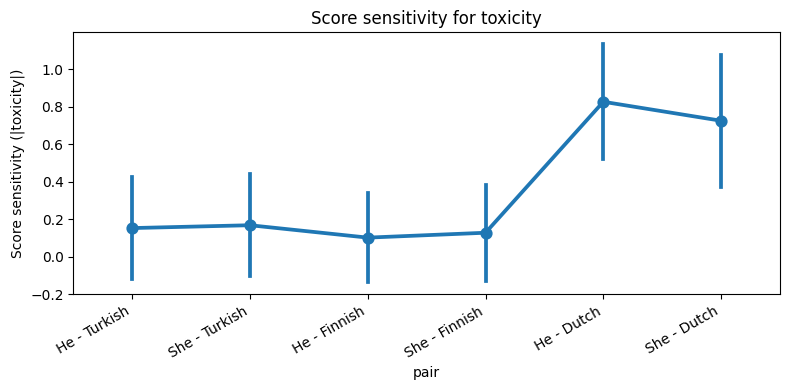

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pairs_tox = {
    "He - Turkish": (df_english_toxicity_male, df_turkish_toxicity_male),
    "She - Turkish": (df_english_toxicity_female, df_turkish_toxicity_female),
    "He - Finnish": (df_english_toxicity_male, df_finnish_toxicity_male),
    "She - Finnish": (df_english_toxicity_female, df_finnish_toxicity_female),
    "He - Dutch": (df_english_toxicity_male, df_dutch_toxicity_male),
    "She - Dutch": (df_english_toxicity_female, df_dutch_toxicity_female),
}

rows_tox = []
for name, (df_en, df_lang) in pairs_tox.items():
    diffs = ScoreDiff(df_en, df_lang, "toxicity_score")
    for d in diffs:
        rows_tox.append({"pair": name, "ScoreDiff": d})

df_tox_diff = pd.DataFrame(rows_tox)

plt.figure(figsize=(8,4))
sns.pointplot(data=df_tox_diff, x="pair", y="ScoreDiff", errorbar="sd")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Score sensitivity (|toxicity|)")
plt.title("Score sensitivity for toxicity")
plt.tight_layout()
plt.show()


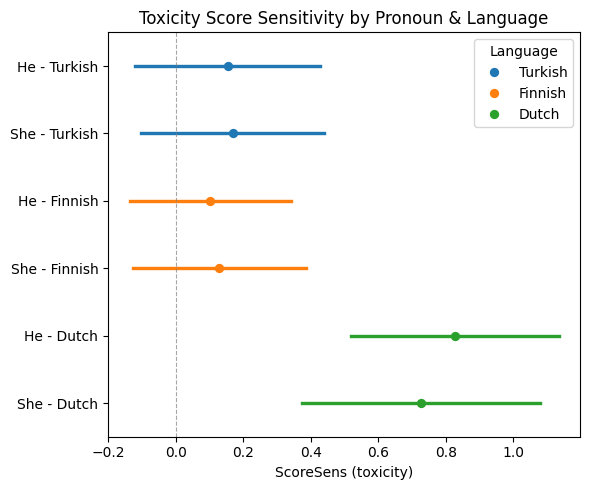

In [ ]:
pairs_tox = {
    "He - Turkish": (df_english_toxicity_male, df_turkish_toxicity_male),
    "She - Turkish": (df_english_toxicity_female, df_turkish_toxicity_female),
    "He - Finnish": (df_english_toxicity_male, df_finnish_toxicity_male),
    "She - Finnish": (df_english_toxicity_female, df_finnish_toxicity_female),
    "He - Dutch": (df_english_toxicity_male, df_dutch_toxicity_male),
    "She - Dutch": (df_english_toxicity_female, df_dutch_toxicity_female),
}

rows_tox = []
for name, (df_en, df_lang) in pairs_tox.items():
    diffs = ScoreDiff(df_en, df_lang, "toxicity_score")
    for d in diffs:
        rows_tox.append({"pair": name, "ScoreDiff": d})

df_tox_diff = pd.DataFrame(rows_tox)

# Extract language from the 'pair' column for coloring
df_tox_diff['Language'] = df_tox_diff['pair'].apply(lambda x: x.split(' - ')[1])

plt.figure(figsize=(6, 5))

sns.pointplot(
    data=df_tox_diff,
    x="ScoreDiff",
    y="pair",
    hue="Language",
    errorbar="sd",
    join=False,
    markers="o",
    scale=0.9
)

plt.axvline(0.0, ls="--", lw=0.8, color="grey", alpha=0.7)
plt.xlabel("ScoreSens (toxicity)")
plt.ylabel("")
plt.title("Toxicity Score Sensitivity by Pronoun & Language")
plt.tight_layout()
plt.show()

It seems like the score sensitivity is really determined by the language itself, rather than gender. In this case Turkish sentences are slightly more toxic than Finnish sentences. Meanwhile the differences between gendered pronouns are less significant (or smaller) compared to the differences in the language chosen.

### Sentiment

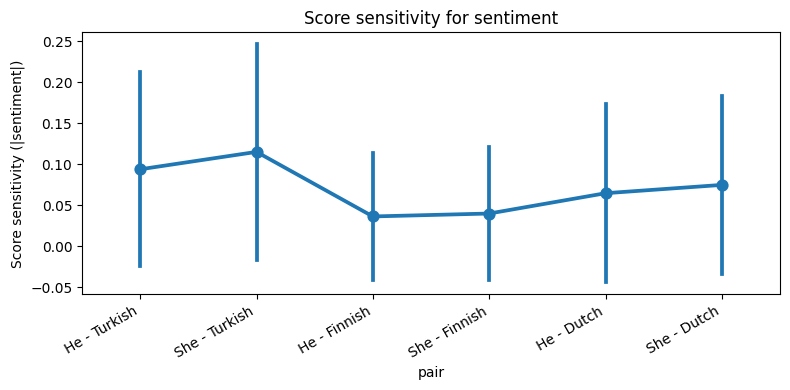

In [ ]:
pairs_sent = {
    "He - Turkish": (df_english_sentiment_male, df_turkish_sentiment_male),
    "She - Turkish": (df_english_sentiment_female, df_turkish_sentiment_female),
    "He - Finnish": (df_english_sentiment_male, df_finnish_sentiment_male),
    "She - Finnish": (df_english_sentiment_female, df_finnish_sentiment_female),
    "He - Dutch": (df_english_sentiment_male, df_dutch_sentiment_male),
    "She - Dutch": (df_english_sentiment_female, df_dutch_sentiment_female),
}

rows_sent = []
for name, (df_en, df_lang) in pairs_sent.items():
    diffs = ScoreDiff(df_en, df_lang, "score")
    for d in diffs:
        rows_sent.append({"pair": name, "ScoreDiff": d})

df_sent_diff = pd.DataFrame(rows_sent)

plt.figure(figsize=(8,4))
sns.pointplot(data=df_sent_diff, x="pair", y="ScoreDiff", errorbar="sd")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Score sensitivity (|sentiment|)")
plt.title("Score sensitivity for sentiment")
plt.tight_layout()
plt.show()


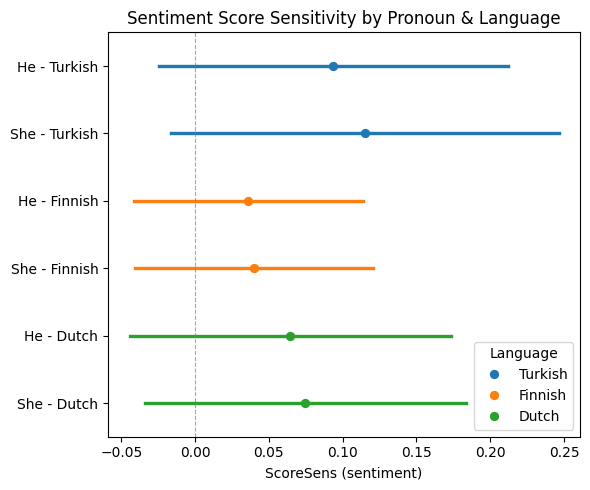

In [ ]:
pairs_sent = {
    "He - Turkish": (df_english_sentiment_male, df_turkish_sentiment_male),
    "She - Turkish": (df_english_sentiment_female, df_turkish_sentiment_female),
    "He - Finnish": (df_english_sentiment_male, df_finnish_sentiment_male),
    "She - Finnish": (df_english_sentiment_female, df_finnish_sentiment_female),
    "He - Dutch": (df_english_sentiment_male, df_dutch_sentiment_male),
    "She - Dutch": (df_english_sentiment_female, df_dutch_sentiment_female),
}

rows_sent = []
for name, (df_en, df_lang) in pairs_sent.items():
    diffs = ScoreDiff(df_en, df_lang, "score")
    for d in diffs:
        rows_sent.append({"pair": name, "ScoreDiff": d})

df_sent_diff = pd.DataFrame(rows_sent)

# Extract language from the 'pair' column for coloring
df_sent_diff['Language'] = df_sent_diff['pair'].apply(lambda x: x.split(' - ')[1])

plt.figure(figsize=(6, 5))

# PSA-style: horizontal point plot with mean \u00b1 sd per row
sns.pointplot(
    data=df_sent_diff,
    x="ScoreDiff",
    y="pair",
    hue="Language", # Use the new 'Language' column for coloring
    errorbar="sd",
    join=False,
    markers="o",
    scale=0.9
)

plt.axvline(0.0, ls="--", lw=0.8, color="grey", alpha=0.7)
plt.xlabel("ScoreSens (sentiment)")
plt.ylabel("")   # y labels are the pair names already
plt.title("Sentiment Score Sensitivity by Pronoun & Language")
plt.tight_layout()
plt.show()

The same conclusion can be yielded hear, with even more polarization in the level of sentiment value between each languages. This graph indicates that English sentences are often considered more positive than turkish languages, and at the while finnish sentences are more positive than english sentences. We could say that the gendered pronouns doesn't have a signficant effect.

# Visualize Label Distance
### Toxicity

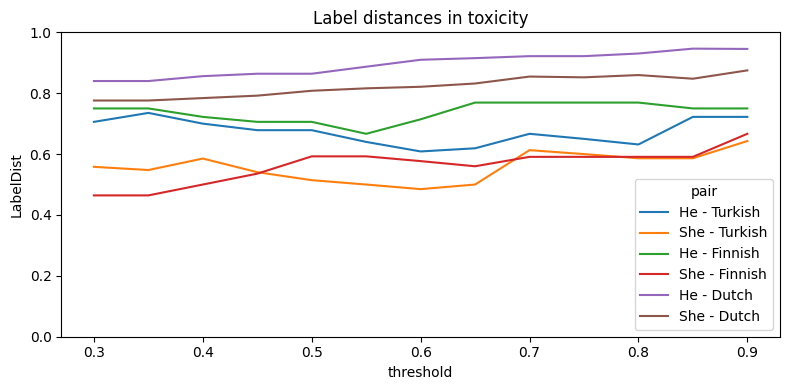

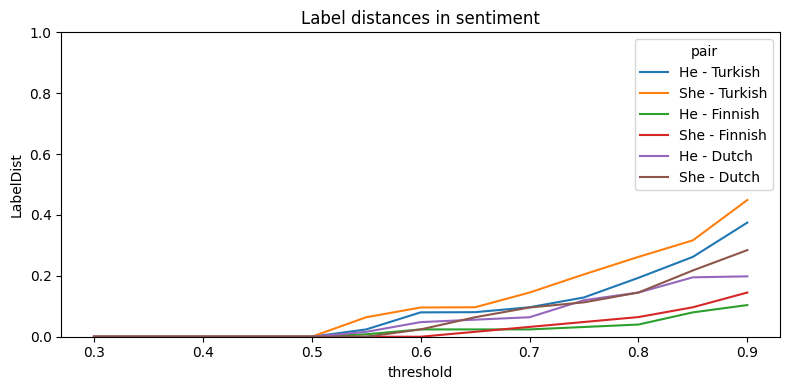

In [ ]:
import numpy as np

thresholds = np.arange(0.3, 0.91, 0.05)

rows_ld_tox = []
for thr in thresholds:
    for name, (df_en, df_lang) in pairs_tox.items():
        ld = LabelDist(df_en, df_lang, thr, "toxicity_score")
        rows_ld_tox.append({"threshold": thr, "pair": name, "LabelDist": ld})

df_ld_tox = pd.DataFrame(rows_ld_tox)

plt.figure(figsize=(8,4))
sns.lineplot(data=df_ld_tox, x="threshold", y="LabelDist", hue="pair")
plt.ylim(0,1)
plt.title("Label distances in toxicity")
plt.tight_layout()
plt.show()

rows_ld_sent = []
for thr in thresholds:
    for name, (df_en, df_lang) in pairs_sent.items():
        ld = LabelDist(df_en, df_lang, thr, "score")
        rows_ld_sent.append({"threshold": thr, "pair": name, "LabelDist": ld})

df_ld_sent = pd.DataFrame(rows_ld_sent)

plt.figure(figsize=(8,4))
sns.lineplot(data=df_ld_sent, x="threshold", y="LabelDist", hue="pair")
plt.ylim(0,1)
plt.title("Label distances in sentiment")
plt.tight_layout()
plt.show()


We could see that at all thresholds there exist volatility of toxicity classifications. The language that has the greatest label distance is the Finnish translation of the male pronoun sentences. It seems like the male sentences have the most volatile outcome compared to female sentences, indicating that NLP models factor in more gender bias in male sentences than female pronoun sentences.

### ScoreDev and ScoreRange bar plots (toxicity)

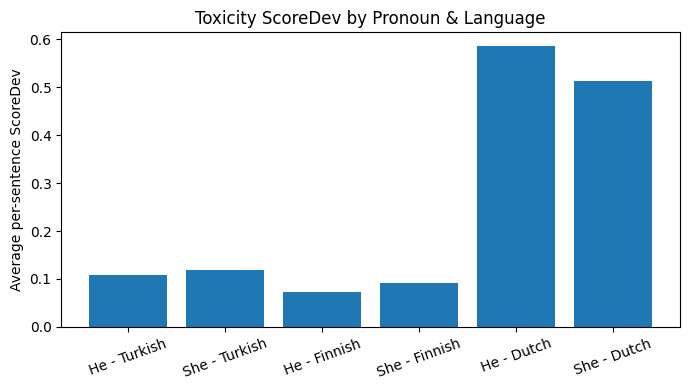

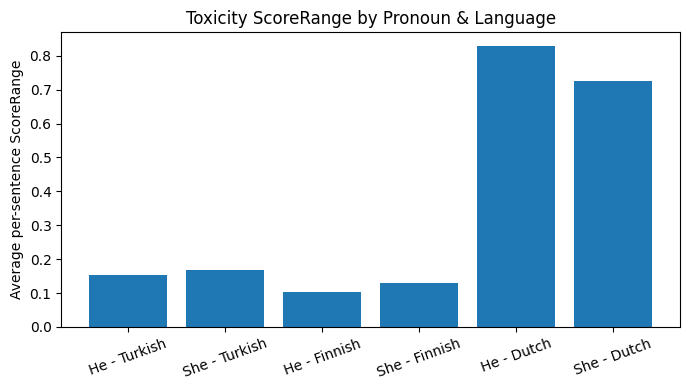

In [ ]:
rows_tox_sd = []
for name, (df_en, df_lang) in pairs_tox.items():
    sd = ScoreDev(df_en, df_lang, "toxicity_score")
    sr = ScoreRange(df_en, df_lang, "toxicity_score")
    rows_tox_sd.append({"pair": name, "ScoreDev": sd, "ScoreRange": sr})

df_tox_sd = pd.DataFrame(rows_tox_sd)

plt.figure(figsize=(7,4))
plt.bar(df_tox_sd["pair"], df_tox_sd["ScoreDev"])
plt.ylabel("Average per-sentence ScoreDev")
plt.title("Toxicity ScoreDev by Pronoun & Language")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,4))
plt.bar(df_tox_sd["pair"], df_tox_sd["ScoreRange"])
plt.ylabel("Average per-sentence ScoreRange")
plt.title("Toxicity ScoreRange by Pronoun & Language")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


### ScoreDev and ScoreRange bar plots (sentiment)

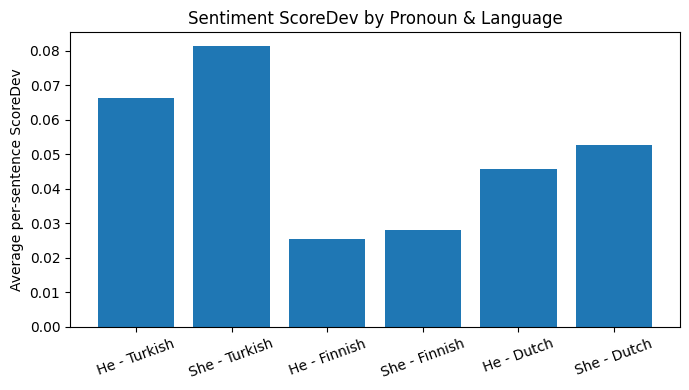

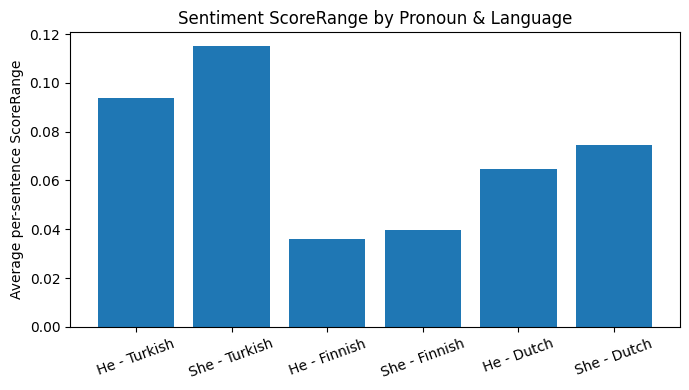

In [ ]:
rows_sent_sd = []
for name, (df_en, df_lang) in pairs_sent.items():
    sd = ScoreDev(df_en, df_lang, "score")
    sr = ScoreRange(df_en, df_lang, "score")
    rows_sent_sd.append({"pair": name, "ScoreDev": sd, "ScoreRange": sr})

df_sent_sd = pd.DataFrame(rows_sent_sd)

x_labels = df_sent_sd["pair"]

plt.figure(figsize=(7,4))
plt.bar(x_labels, df_sent_sd["ScoreDev"])
plt.ylabel("Average per-sentence ScoreDev")
plt.title("Sentiment ScoreDev by Pronoun & Language")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,4))
plt.bar(x_labels, df_sent_sd["ScoreRange"])
plt.ylabel("Average per-sentence ScoreRange")
plt.title("Sentiment ScoreRange by Pronoun & Language")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


## On average, what are the scores produced by english sentences vs genderless language sentences?

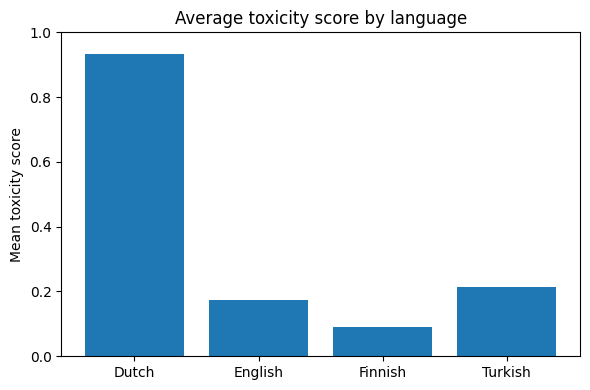

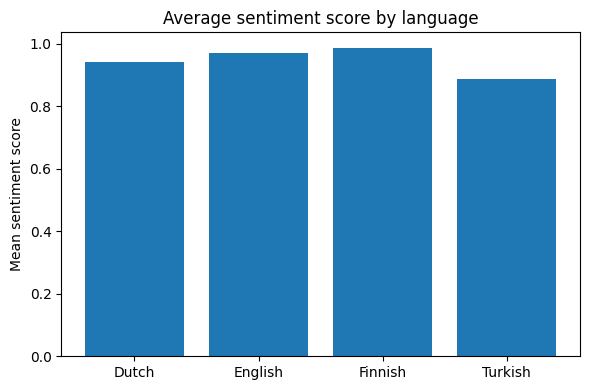

In [ ]:
tox_all = pd.concat([
    df_english_toxicity_female,
    df_english_toxicity_male,
    df_turkish_toxicity_female,
    df_turkish_toxicity_male,
    df_finnish_toxicity_female,
    df_finnish_toxicity_male,
    df_dutch_toxicity_female,
    df_dutch_toxicity_male
], ignore_index=True)

sent_all = pd.concat([
    df_english_sentiment_female,
    df_english_sentiment_male,
    df_turkish_sentiment_female,
    df_turkish_sentiment_male,
    df_finnish_sentiment_female,
    df_finnish_sentiment_male,
    df_dutch_sentiment_female,
    df_dutch_sentiment_male
], ignore_index=True)

tox_means = tox_all.groupby("lang")["toxicity_score"].mean().reset_index()
sent_means = sent_all.groupby("lang")["score"].mean().reset_index()

plt.figure(figsize=(6,4))
plt.bar(tox_means["lang"], tox_means["toxicity_score"])
plt.ylim(0,1)
plt.ylabel("Mean toxicity score")
plt.title("Average toxicity score by language")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.bar(sent_means["lang"], sent_means["score"])
plt.ylabel("Mean sentiment score")
plt.title("Average sentiment score by language")
plt.tight_layout()
plt.show()


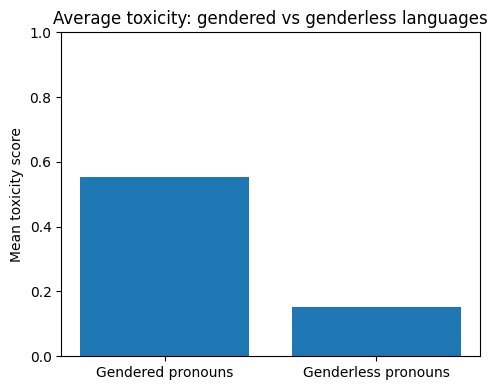

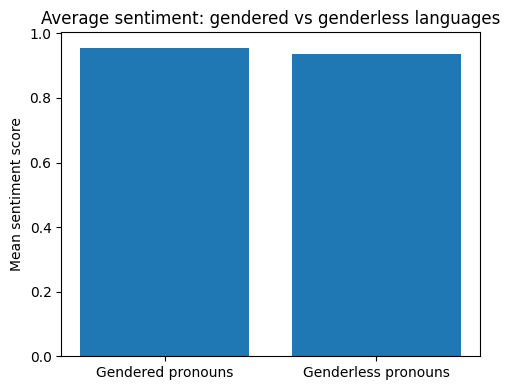

In [ ]:
gendered_langs = ["English", "Dutch"]
genderless_langs = ["Turkish", "Finnish"]

mean_tox_gendered = tox_all[tox_all["lang"].isin(gendered_langs)]["toxicity_score"].mean()
mean_tox_genderless = tox_all[tox_all["lang"].isin(genderless_langs)]["toxicity_score"].mean()

mean_sent_gendered = sent_all[sent_all["lang"].isin(gendered_langs)]["score"].mean()
mean_sent_genderless = sent_all[sent_all["lang"].isin(genderless_langs)]["score"].mean()

df_tox_gvsg = pd.DataFrame({
    "group": ["Gendered pronouns", "Genderless pronouns"],
    "mean_toxicity": [mean_tox_gendered, mean_tox_genderless]
})

df_sent_gvsg = pd.DataFrame({
    "group": ["Gendered pronouns", "Genderless pronouns"],
    "mean_sentiment": [mean_sent_gendered, mean_sent_genderless]
})

plt.figure(figsize=(5,4))
plt.bar(df_tox_gvsg["group"], df_tox_gvsg["mean_toxicity"])
plt.ylim(0,1)
plt.ylabel("Mean toxicity score")
plt.title("Average toxicity: gendered vs genderless languages")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,4))
plt.bar(df_sent_gvsg["group"], df_sent_gvsg["mean_sentiment"])
plt.ylabel("Mean sentiment score")
plt.title("Average sentiment: gendered vs genderless languages")
plt.tight_layout()
plt.show()


It seems like sentences with gendered pronouns tend to be 1) classified with higher toxicity score, and 2) classified with a more positive sentiment score